<a href="https://colab.research.google.com/github/mohamedghaly1/Images-histogram-analysis/blob/main/ImagesHistogramAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and Image

**Import Libraries**

In [ ]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# Calculate Histograms

**Calculate Histogram**

In [ ]:
def CalculateHistogram(imageArray):
    histogram = [0] * 256
    for pixel in imageArray.flatten():
        histogram[pixel] += 1
    return histogram

**Calculate Cumulative Histogram**

In [ ]:
def CalculateCumulativeHistogram(histogram):
    cumHistogram = [0.0] * len(histogram)
    ccumSum = 0.0
    for i in range(len(histogram)):
        ccumSum += float(histogram[i])
        cumHistogram[i] = ccumSum
    return cumHistogram

# Analyze histogram

**Get Color At Percentage**

In [ ]:
def GetColorAtPercentage(cumHistogram, percent):
    totalP = cumHistogram[-1]
    minP = (percent / 100) * totalP
    maxP = ((100 - percent) / 100) * totalP
    minI = next(i for i, value in enumerate(cumHistogram) if value >= minP)
    maxI = next(i for i, value in enumerate(cumHistogram) if value >= maxP)
    return minI, maxI

**Get Colors At Max Slope**

In [ ]:
def GetColorsAtMaxSlope(cumHistogram):
  maxSlopeScore = -1.0
  final_i, final_j = 0, 0
  for i in range(0, 255):
      for j in range(i + 1, 256):
        delta = ((cumHistogram[j] - cumHistogram[i])**4)
        slopeScore = (delta / (j - i))
        if slopeScore > maxSlopeScore:
                maxSlopeScore = slopeScore
                final_i, final_j = i, j

  return final_i, final_j

# Modify histogram

**Contrast Streching**

In [ ]:
def StretchContrast(imageArray,a,b,c,d):
    cs = np.zeros_like(imageArray,dtype='float')
    scale=(b-a)/(d-c)
    for i in range(imageArray.shape[0]):
        for j in range(imageArray.shape[1]):
            cs[i, j] = np.clip(a + scale * (imageArray[i, j] - c), 0, 255)

    return cs.astype(np.uint8)

**Histogram Equalization**

In [ ]:
def EqualizeHistogram(imageArray,a,b):
    h, bins = np.histogram(imageArray.flatten(), 256, [0, 255])
    h[:a] = 0
    h[b + 1:] = 0
    c = np.zeros_like(h, dtype=np.int32)
    sum = 0
    for i in range(len(h)):
        sum += h[i]
        c[i] = sum
    cNormalized = c * (255 / c[-1])
    e = np.interp(imageArray.flatten(), bins[:-1], cNormalized)
    return e.reshape(imageArray.shape).astype(np.uint8)

# Tests

In [ ]:
image = Image.open("/content/sample_data/test.jpg").convert('L')
imageArray = np.array(image)

In [ ]:
originalImageHistogram = CalculateHistogram(imageArray)
originalImageHistogram

[175,
 82,
 78,
 83,
 77,
 45,
 45,
 41,
 31,
 27,
 42,
 27,
 28,
 25,
 18,
 19,
 19,
 12,
 11,
 11,
 5,
 6,
 6,
 4,
 6,
 3,
 4,
 9,
 6,
 3,
 3,
 6,
 4,
 4,
 3,
 2,
 2,
 2,
 5,
 2,
 2,
 3,
 3,
 9,
 8,
 6,
 8,
 10,
 23,
 17,
 33,
 51,
 52,
 48,
 33,
 33,
 34,
 45,
 42,
 37,
 27,
 25,
 28,
 33,
 23,
 31,
 35,
 34,
 45,
 67,
 55,
 112,
 139,
 195,
 280,
 337,
 536,
 724,
 944,
 1142,
 1597,
 2073,
 2869,
 3804,
 4537,
 4966,
 6337,
 7625,
 8821,
 10398,
 10308,
 12200,
 13638,
 13747,
 13850,
 15633,
 18645,
 18515,
 22300,
 23796,
 24999,
 22193,
 19856,
 21778,
 19785,
 20683,
 22307,
 21793,
 20211,
 15333,
 14090,
 13413,
 13160,
 12402,
 11319,
 13704,
 12394,
 12875,
 13229,
 12378,
 11215,
 10977,
 12167,
 11558,
 11660,
 11159,
 11726,
 10584,
 10864,
 8800,
 8240,
 7360,
 7763,
 7489,
 7584,
 6778,
 6452,
 7107,
 7564,
 8354,
 9283,
 10732,
 10787,
 13194,
 13664,
 13481,
 13799,
 14021,
 12879,
 8740,
 5760,
 3249,
 2508,
 1833,
 1649,
 1771,
 1624,
 1495,
 1184,
 1050,
 996,
 1

In [ ]:
originalImageCumulativeHistogram = CalculateCumulativeHistogram(originalImageHistogram)
originalImageCumulativeHistogram

[175.0,
 257.0,
 335.0,
 418.0,
 495.0,
 540.0,
 585.0,
 626.0,
 657.0,
 684.0,
 726.0,
 753.0,
 781.0,
 806.0,
 824.0,
 843.0,
 862.0,
 874.0,
 885.0,
 896.0,
 901.0,
 907.0,
 913.0,
 917.0,
 923.0,
 926.0,
 930.0,
 939.0,
 945.0,
 948.0,
 951.0,
 957.0,
 961.0,
 965.0,
 968.0,
 970.0,
 972.0,
 974.0,
 979.0,
 981.0,
 983.0,
 986.0,
 989.0,
 998.0,
 1006.0,
 1012.0,
 1020.0,
 1030.0,
 1053.0,
 1070.0,
 1103.0,
 1154.0,
 1206.0,
 1254.0,
 1287.0,
 1320.0,
 1354.0,
 1399.0,
 1441.0,
 1478.0,
 1505.0,
 1530.0,
 1558.0,
 1591.0,
 1614.0,
 1645.0,
 1680.0,
 1714.0,
 1759.0,
 1826.0,
 1881.0,
 1993.0,
 2132.0,
 2327.0,
 2607.0,
 2944.0,
 3480.0,
 4204.0,
 5148.0,
 6290.0,
 7887.0,
 9960.0,
 12829.0,
 16633.0,
 21170.0,
 26136.0,
 32473.0,
 40098.0,
 48919.0,
 59317.0,
 69625.0,
 81825.0,
 95463.0,
 109210.0,
 123060.0,
 138693.0,
 157338.0,
 175853.0,
 198153.0,
 221949.0,
 246948.0,
 269141.0,
 288997.0,
 310775.0,
 330560.0,
 351243.0,
 373550.0,
 395343.0,
 415554.0,
 430887.0,
 444977.0

In [ ]:
min_intensity_5, max_intensity_5 = GetColorAtPercentage(originalImageCumulativeHistogram, 5)
print(min_intensity_5, max_intensity_5)
min_intensity_10, max_intensity_10 = GetColorAtPercentage(originalImageCumulativeHistogram, 10)
print(min_intensity_10, max_intensity_10)
min_intensity_15, max_intensity_15 = GetColorAtPercentage(originalImageCumulativeHistogram, 15)
print(min_intensity_15, max_intensity_15)

88 152
92 146
95 143


In [ ]:
final_i, final_j = GetColorsAtMaxSlope(originalImageCumulativeHistogram)
print(final_i, final_j)

82 151


In [ ]:
stretched_image_5 = StretchContrast(imageArray,0,255,min_intensity_5,max_intensity_5)
stretched_image_10 = StretchContrast(imageArray,0,255,min_intensity_10,max_intensity_10)
stretched_image_15 = StretchContrast(imageArray,0,255,min_intensity_15,max_intensity_15)
stretched_image_s = StretchContrast(imageArray,0,255,final_i,final_j)

In [ ]:
equalized_image_5 = EqualizeHistogram(imageArray,min_intensity_5,max_intensity_5)
equalized_image_10 = EqualizeHistogram(imageArray,min_intensity_10,max_intensity_10)
equalized_image_15 = EqualizeHistogram(imageArray,min_intensity_15,max_intensity_15)
equalized_image_s = EqualizeHistogram(imageArray,final_i,final_j)

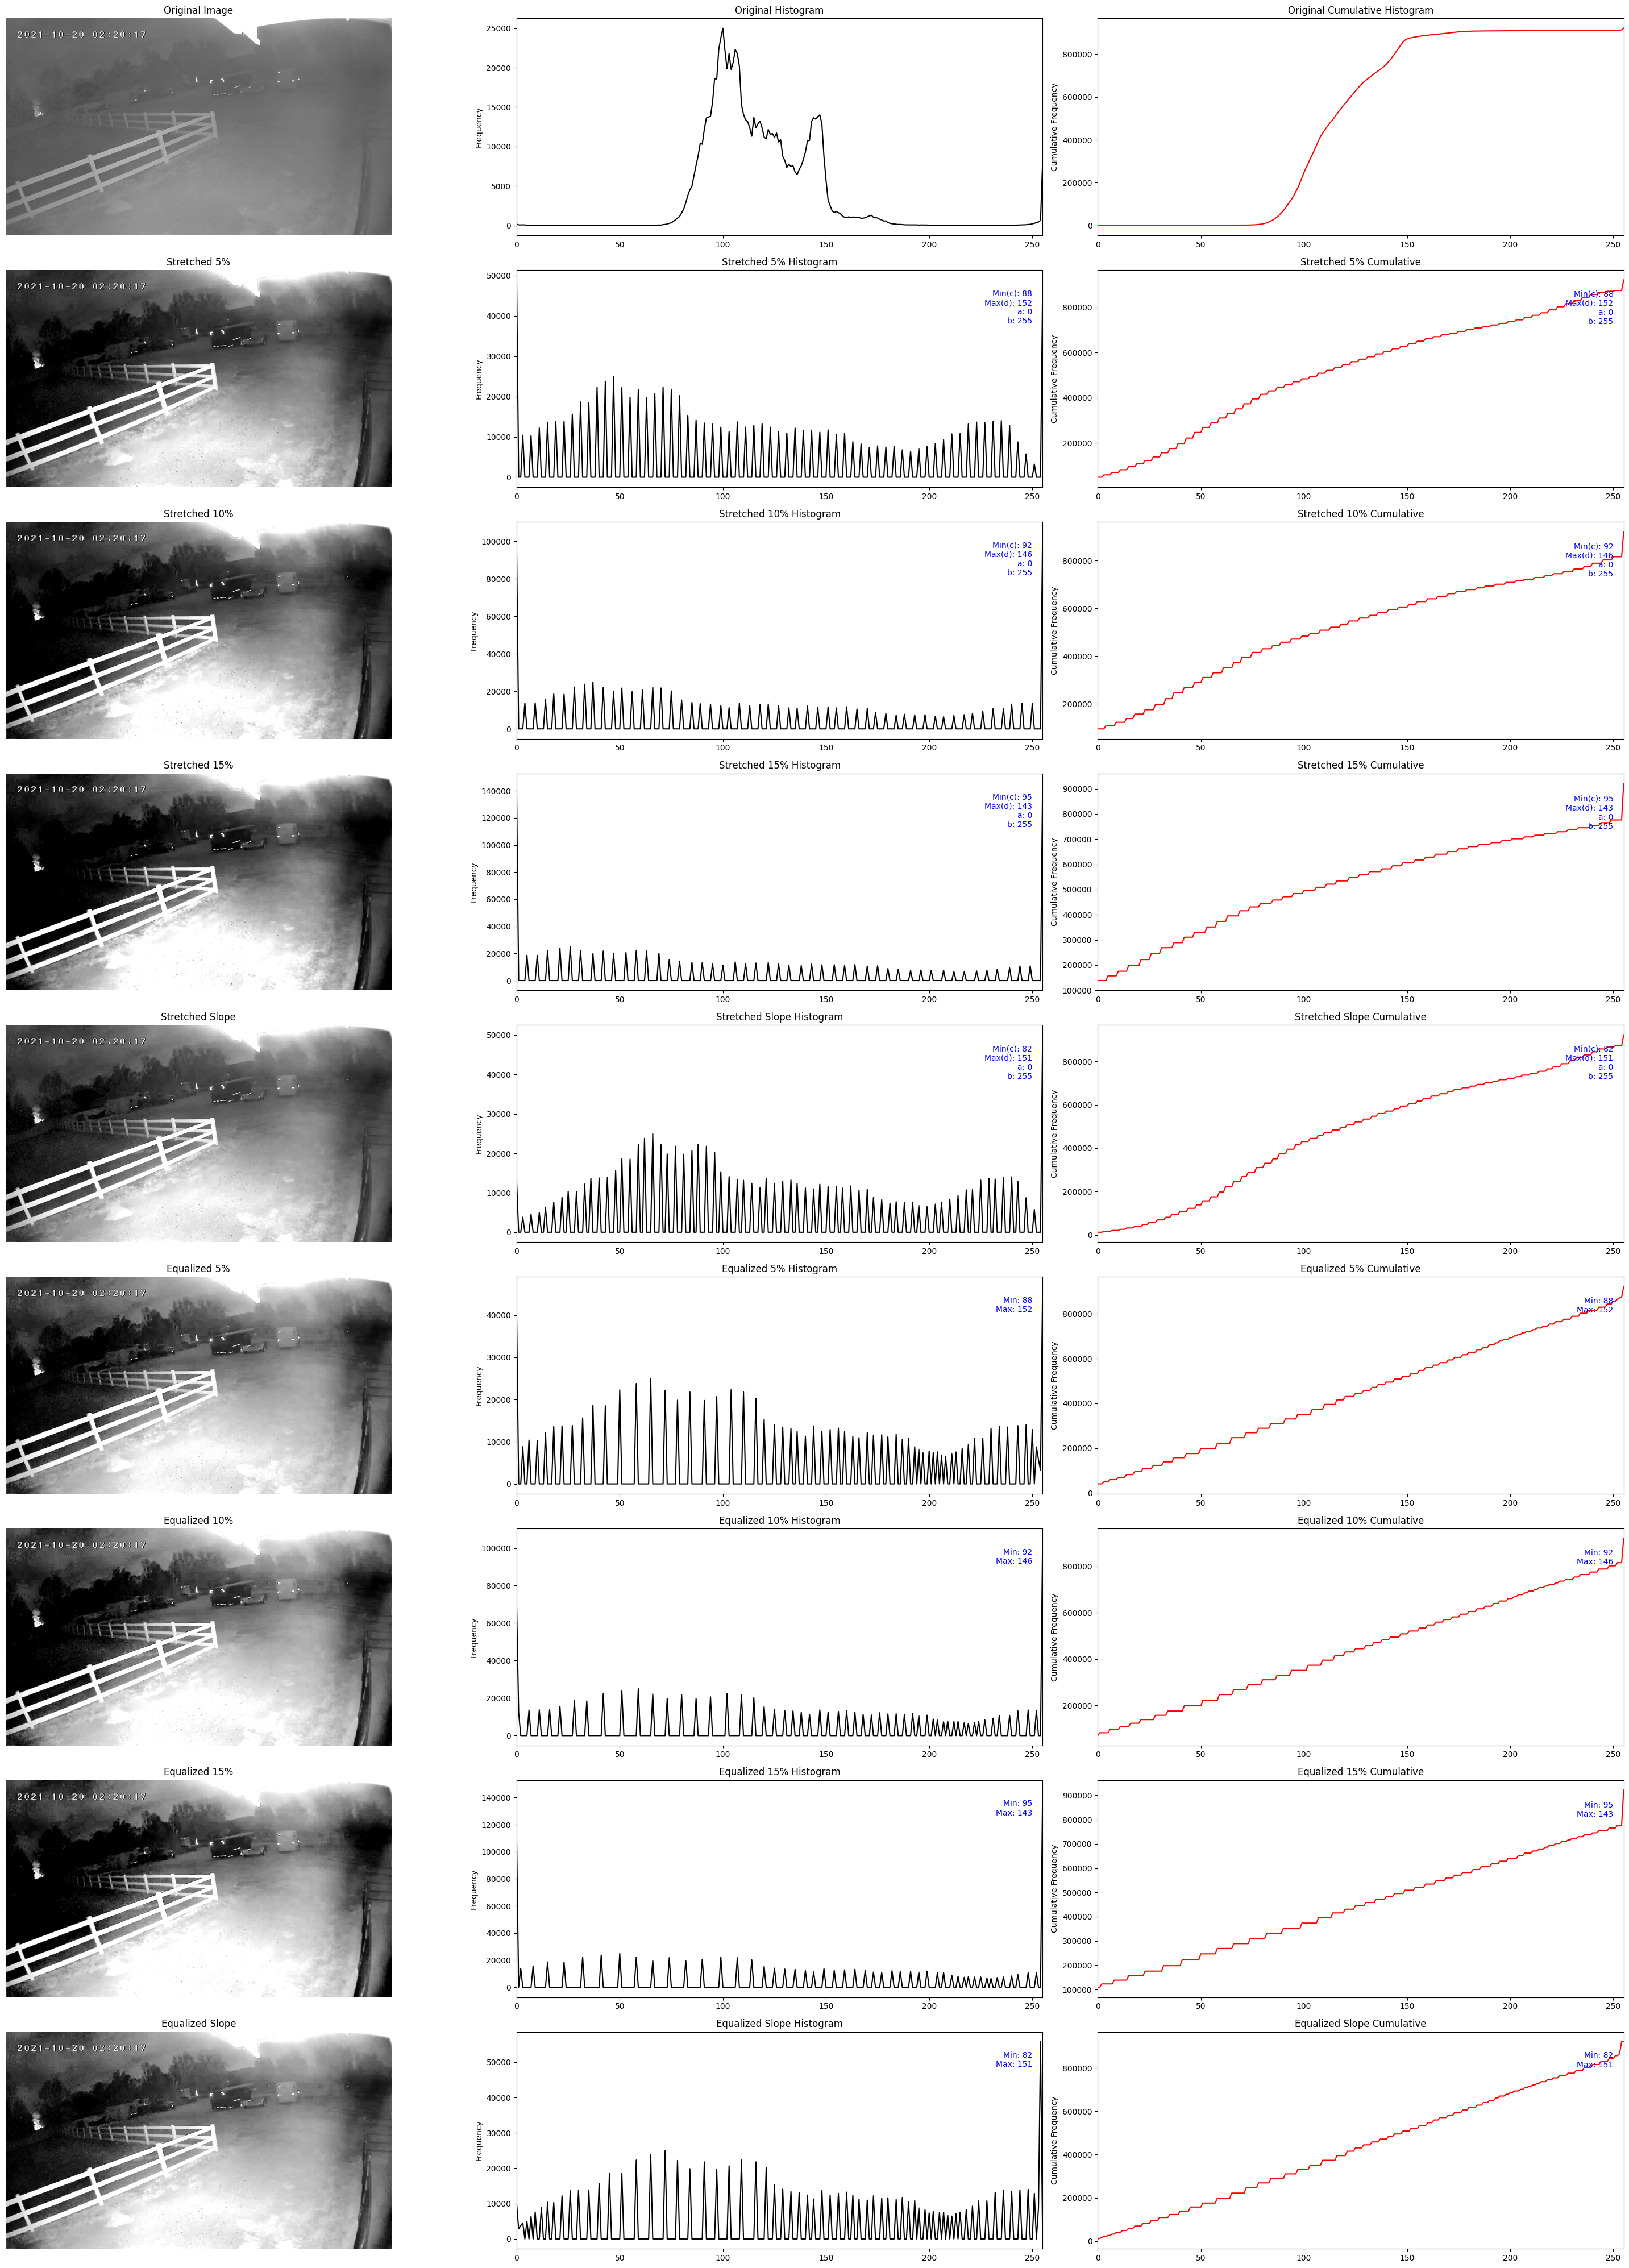

In [ ]:
plt.figure(figsize=(30, 40))


plt.subplot(9, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(9, 3, 2)
plt.plot(originalImageHistogram, color='black')
plt.title('Original Histogram')
plt.xlim([0, 255])
plt.ylabel('Frequency')

plt.subplot(9,3, 3)
plt.plot(originalImageCumulativeHistogram, color='red')
plt.title('Original Cumulative Histogram')
plt.xlim([0, 255])
plt.ylabel('Cumulative Frequency')
stretched_images = [stretched_image_5, stretched_image_10, stretched_image_15, stretched_image_s]
equalized_images = [equalized_image_5, equalized_image_10, equalized_image_15, equalized_image_s]
stretch_labels = ["Stretched 5%", "Stretched 10%", "Stretched 15%", "Stretched Slope"]
equalized_labels = ["Equalized 5%", "Equalized 10%", "Equalized 15%", "Equalized Slope"]
min_intensities = [min_intensity_5, min_intensity_10, min_intensity_15, final_i]
max_intensities = [max_intensity_5, max_intensity_10, max_intensity_15, final_j]


for i, (stretched_img, label, min_intensity, max_intensity) in enumerate(zip(stretched_images, stretch_labels, min_intensities, max_intensities)):
    pos = (i*3)+4


    plt.subplot(9,3, pos)
    plt.imshow(stretched_img, cmap='gray')
    plt.title(label)
    plt.axis('off')

    plt.subplot(9, 3, pos + 1)
    histogram = CalculateHistogram(stretched_img)
    plt.plot(histogram, color='black')
    plt.title(f'{label} Histogram')
    plt.xlim([0, 255])
    plt.ylabel('Frequency')
    plt.text(250, max(histogram) * 0.95, f'Min(c): {min_intensity}\nMax(d): {max_intensity}\na: 0\nb: 255', color='blue', ha='right', va='top')

    plt.subplot(9, 3, pos + 2)
    cumulative_hist = CalculateCumulativeHistogram(histogram)
    plt.plot(cumulative_hist, color='red')
    plt.title(f'{label} Cumulative')
    plt.xlim([0, 255])
    plt.ylabel('Cumulative Frequency')
    plt.text(250, max(cumulative_hist) * 0.95, f'Min(c): {min_intensity}\nMax(d): {max_intensity}\na: 0\nb: 255', color='blue', ha='right', va='top')



for i, (equalized_img, label, min_intensity, max_intensity) in enumerate(zip(equalized_images, equalized_labels, min_intensities, max_intensities)):
    pos = (i*3)+16

    plt.subplot(9, 3, pos)
    plt.imshow(equalized_img, cmap='gray')
    plt.title(label)
    plt.axis('off')

    plt.subplot(9, 3, pos + 1)
    histogram = CalculateHistogram(equalized_img)
    plt.plot(histogram, color='black')
    plt.title(f'{label} Histogram')
    plt.xlim([0, 255])
    plt.ylabel('Frequency')
    plt.text(250, max(histogram) * 0.95, f'Min: {min_intensity}\nMax: {max_intensity}', color='blue', ha='right', va='top')


    plt.subplot(9, 3, pos + 2)
    cumulative_hist = CalculateCumulativeHistogram(histogram)
    plt.plot(cumulative_hist, color='red')
    plt.title(f'{label} Cumulative')
    plt.xlim([0, 255])
    plt.ylabel('Cumulative Frequency')
    plt.text(250, max(cumulative_hist) * 0.95, f'Min: {min_intensity}\nMax: {max_intensity}', color='blue', ha='right', va='top')

plt.tight_layout()
plt.show()





(-0.5, 1279.5, 719.5, -0.5)

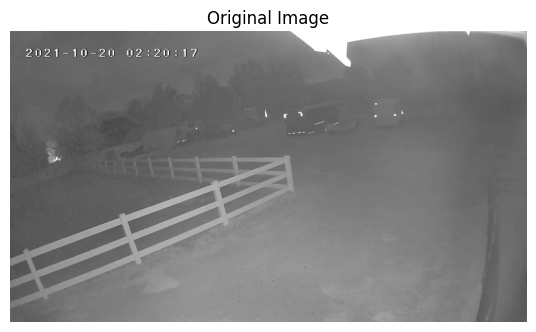

In [ ]:
plt.figure(figsize=(30, 40))
 #Original image and its histogram
plt.subplot(9, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')




Text(0, 0.5, 'Frequency')

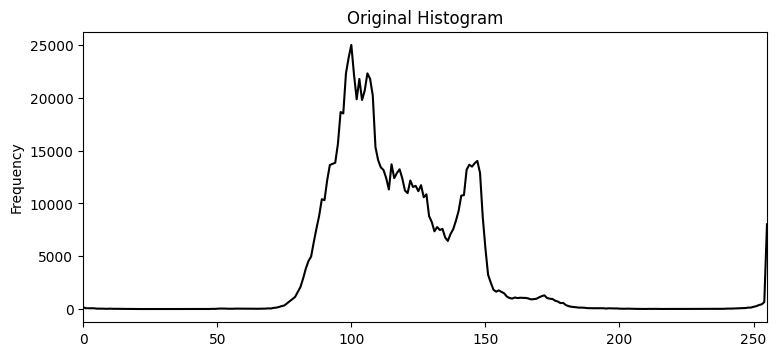

In [ ]:
plt.figure(figsize=(30, 40))
plt.subplot(9, 3, 2)
plt.plot(originalImageHistogram, color='black')
plt.title('Original Histogram')
plt.xlim([0, 255])
plt.ylabel('Frequency')


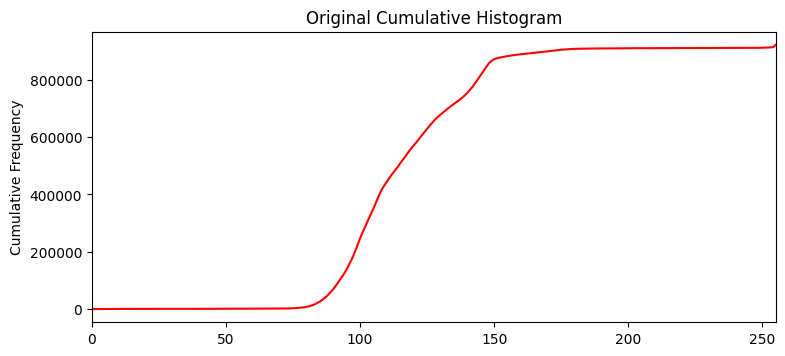

In [ ]:
plt.figure(figsize=(30, 40))
plt.subplot(9,3, 3)
plt.plot(originalImageCumulativeHistogram, color='red')
plt.title('Original Cumulative Histogram')
plt.xlim([0, 255])
plt.ylabel('Cumulative Frequency')
stretched_images = [stretched_image_5, stretched_image_10, stretched_image_15, stretched_image_s]
equalized_images = [equalized_image_5, equalized_image_10, equalized_image_15, equalized_image_s]
stretch_labels = ["Stretched 5%", "Stretched 10%", "Stretched 15%", "Stretched Slope"]
equalized_labels = ["Equalized 5%", "Equalized 10%", "Equalized 15%", "Equalized Slope"]
min_intensities = [min_intensity_5, min_intensity_10, min_intensity_15, final_i]
max_intensities = [max_intensity_5, max_intensity_10, max_intensity_15, final_j]